# This notebook has the plotting codes; use fitting_na_16.ipynb to run optimizations

In [1]:
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats
import curve_fitting as cf
import generalized_genSim_shorten_time as ggsd
import pickle
import time
import json
from deap import tools
import multiprocessing
import eval_helper_na12 as eh16

In [2]:
eh16.set_channel("na12")

In [3]:
import json
with open('./csv_files/mutants_parameters.txt') as f:
    data = f.read()
    js = json.loads(data)
#js['A_wt']

In [4]:
# adjust parameters here

param_range_file = "./csv_files/param_stats_wide_na12.csv"
mutant_name = "m1770LAdult"
mutant_protocol_csv_name = './csv_files/mutant_protocols_CHOP.csv'
get_baseline_param_fn = eh16.get_wt_params_na12()

In [5]:
# just set parameters here, then simply click through to get a dictionary of parameters as well as plots
new_par = [29.37455303390747, -57.73385584119139, 11.891550446498853, 0.7034480970709812, 0.7458471676703804, -76.54492828977375, -4.360135868594882, 1.0753187187691573, 7.743820332718601, 0.4342886254656672, 0.42061600443361485, 1.8527146017814786, 0.17671265620260843, 0.04089488556627415, -37.52777117761381, 4.1662221609375685, -104.4691271236539, 0.05585446125335954, 29.571131958843388, 2.5137334884656872, 56.76570675176218, -116.41680866340164, -6.558415415201545, 48.5320376591091]
p1 = [35.336491999433214, -62.922265018227336, 6.653227770670037, 1.6085194858985032, 1.9610096541498063, -25.131096837653246, -32.726622036137094, 7.4088907890561, 6.087139449301829, 0.04977262720771908, 0.34972666166850597, 8.285176002785123, 0.012852797938524651, 0.02881186435129404, -48.48440841793984, 7.760131602919982, -34.078061414435986, 0.08584137995548408, 79.9573778064748, 1.2622891269923364, 72.38254906735173, -72.65001663340412, 40.10652134477391, 49.56803729217332]
p2 = [34.77892981139749, -66.294037045769, 5.464496811869247, 0.40864335731830415, 1.2310650727729024, -38.882921895537066, -26.469465264992433, 11.531764640824356, 15.279427585419953, 0.32363023807355973, 0.1789145675474932, 3.013863582830406, 0.0349184767215889, 0.0704759163706076, -48.554822018185995, 5.4312120309698, -118.60287032280878, 0.08074950606428268, 77.52593734791336, 2.1617046645599003, 121.88551526010346, -31.957029577792174, 52.74536297526896, 52.09356813604149]
p3 = [31.54792481886196, -62.8112159994801, 8.700996825828236, 1.4607268535439857, 1.844422707279587, -80.99476698853479, -101.62919670167861, 13.735261355277471, 14.019559315832394, 0.023889539205604837, 0.25700571794490246, 10.828429831267053, 0.1981378450019099, 0.15003236251896257, -48.880673910993956, 7.961733956295703, -107.18532204942231, 0.05702053045435554, 52.82077922265611, 1.4556692822094468, 16.712145081378665, -86.35840509103554, -48.33922319366778, 57.37885931442132]
p4 = [2.50174927362012, -49.075965604345726, 4.256561097398563, 1.7075531578235053, 1.3937925228027337, -88.00010149932962, -10.700649720934887, 16.611839043992987, 9.77479647875671, 0.15445174143317517, 0.3596713614114444, 0.0032768068617963775, 0.10421855963698592, 0.03734312096213714, -53.98573630971563, 6.125446362695022, -69.5130609138481, 0.05687140683128808, 64.73457612821498, 2.3566676865170595, 71.70503565324678, -46.96606336792141, -31.567268230253237, 60.113163529777175]
p5 = [23.451884046049866, -31.176490074778304, 9.552185539334623, 0.9559408852324875, 0.3926380881565123, -3.838037039163133, -70.58367893275151, 14.536893341433984, 5.49887590238456, 0.23529432767623584, 0.48499721646606, 11.524804347900913, 0.023321224854688734, 0.0068081589589724135, -37.17470260097235, 5.7131201219438115, -45.08613359258655, 0.028124534790754233, 55.083803568789165, 0.42521067845368005, 12.307699645497175, -59.01998210239223, -2.2381015100814468, 45.93623485950239]



new_par = p5




m1770LAdult:


[23.451884046049866, -31.176490074778304, 9.552185539334623, 0.9559408852324875, 0.3926380881565123, -3.838037039163133, -70.58367893275151, 14.536893341433984, 5.49887590238456, 0.23529432767623584, 0.48499721646606, 11.524804347900913, 0.023321224854688734, 0.0068081589589724135, -37.17470260097235, 5.7131201219438115, -45.08613359258655, 0.028124534790754233, 55.083803568789165, 0.42521067845368005, 12.307699645497175, -59.01998210239223, -2.2381015100814468, 45.93623485950239]

{'sh_na12': 23.451884046049866, 'tha_na12': -31.176490074778304, 'qa_na12': 9.552185539334623, 'Ra_na12': 0.9559408852324875, 'Rb_na12': 0.3926380881565123, 'thi1_na12': -3.838037039163133, 'thi2_na12': -70.58367893275151, 'qd_na12': 14.536893341433984, 'qg_na12': 5.49887590238456, 'mmin_na12': 0.23529432767623584, 'hmin_na12': 0.48499721646606, 'q10_na12': 11.524804347900913, 'Rg_na12': 0.023321224854688734, 'Rd_na12': 0.0068081589589724135, 'thinf_na12': -37.17470260097235, 'qinf_na12': 5.71

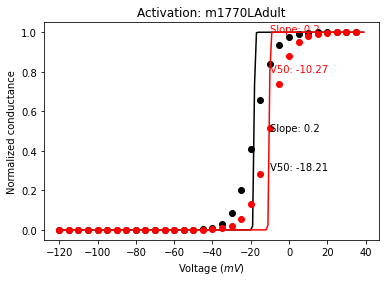

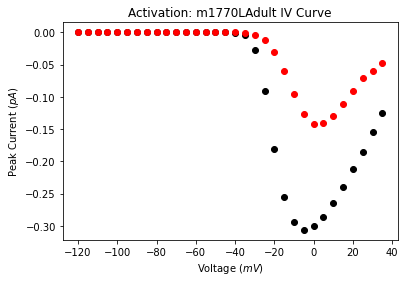

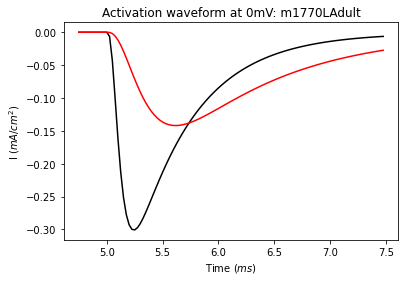

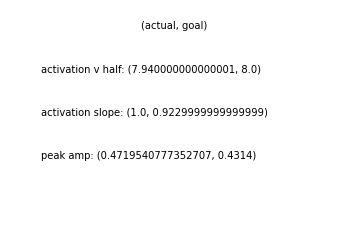

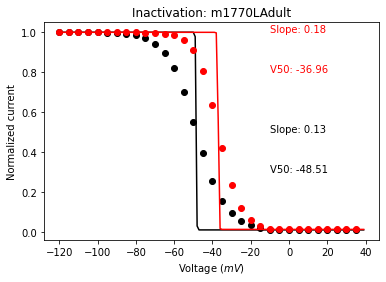

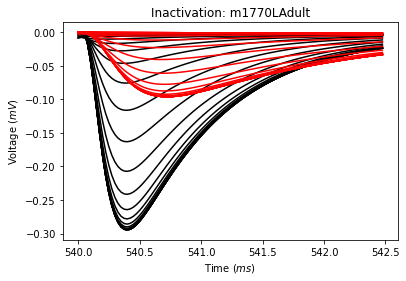

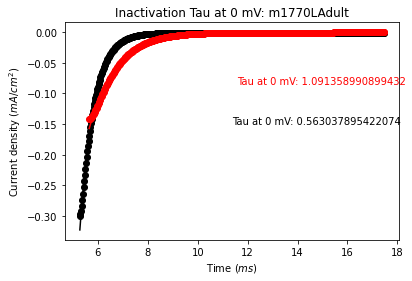

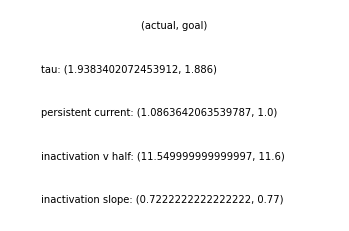

In [6]:
# use this to make a dictionary out of the parameters
print(mutant_name + ":\n\n")
print(new_par)
print()
print(eh16.make_params_dict(new_par))
print()

# makes individual plots, and saves the plots as a pdf file to "filename"
eh16.make_act_plots(new_par, mutant_name, mutant_protocol_csv_name, param_values_wt = get_baseline_param_fn, filename = './Plots_Folder/jinan_act_' + mutant_name + '.pdf')
eh16.make_inact_plots(new_par, mutant_name, mutant_protocol_csv_name, param_values_wt = get_baseline_param_fn, filename = './Plots_Folder/jinan_inact_' + mutant_name + '.pdf')

In [12]:
get_baseline_param_fn

[8.0,
 -28.76,
 5.41,
 0.3282,
 0.1,
 -37.651,
 -30.0,
 0.5,
 1.5,
 0.02,
 0.01,
 2.0,
 0.01,
 0.02657,
 -48.4785,
 7.69,
 -60.0,
 0.0003,
 12.0,
 0.2,
 10.0,
 -58.0,
 2.0,
 55.0]

In [9]:
wt_inact = ggsd.Inactivation(channel_name = 'na12')
wt_inact.genInactivation()

print(wt_inact.v_vec)
print(wt_inact.ipeak_vec)

[-120 -115 -110 -105 -100  -95  -90  -85  -80  -75  -70  -65  -60  -55
  -50  -45  -40  -35  -30  -25  -20  -15  -10   -5    0    5   10   15
   20   25   30   35]
[-0.27127976230719714, -0.27136019279269097, -0.27139359126184315, -0.2713423258994153, -0.2711373489082475, -0.27065247450756313, -0.26965875169810205, -0.2677462257212511, -0.2641985562600116, -0.25781976243906146, -0.24677832284611875, -0.2287127992896136, -0.2015984334734076, -0.1656723517480197, -0.1251357586728385, -0.08685725719202385, -0.056252506235685985, -0.03478222380438569, -0.021378940481373974, -0.013056028099992935, -0.008083531300889969, -0.005204227904167351, -0.003157016947791707, -0.00315701694688603, -0.003157016946886032, -0.003157016946886036, -0.00315701694688603, -0.003157016946886035, -0.0031570169468860335, -0.003157016946886032, -0.0031570169468860317, -0.0031570169468860313]


In [10]:
wt_act = ggsd.Activation(channel_name = 'na12')
wt_act.L

32

In [26]:
from deap.algorithms import *

In [27]:
eaAlphaMuPlusLambdaCheckpoint()

NameError: name 'eaAlphaMuPlusLambdaCheckpoint' is not defined

(actual, goal)
activation v half: (0.0, 0.0)
activation slope: (1.2303030303030302, 1.0)


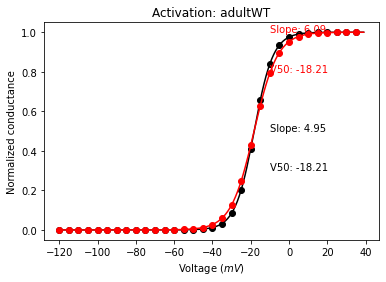

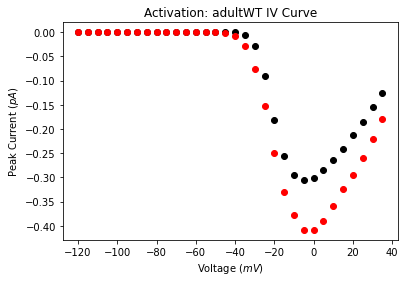

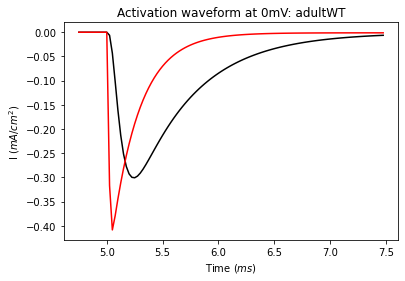

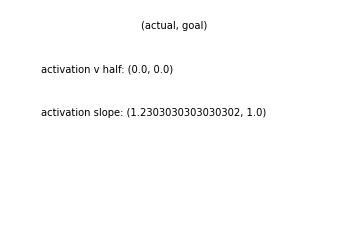

In [8]:
eh16.make_act_plots(new_par, mutant_name, mutant_protocol_csv_name, param_values_wt = get_baseline_param_fn, filename = './Plots_Folder/jinan_act.pdf')

In [14]:
eh16.set_param(get_baseline_param_fn)

In [15]:
act = ggsd.Activation(channel_name = 'na12')
act.clamp_at_volt(0)

In [16]:
curr = np.array(act.all_is)

In [17]:
curr

array([], dtype=float64)

In [18]:
act.ipeak_vec

[-0.3006560575214934]